In [1]:
import os
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode as py_mode

In [2]:
pwd

'C:\\Users\\afalb\\OneDrive\\Escritorio\\Curso de Unicorn Academy\\Python\\Proyecto_integrador'

In [3]:
df = pd.read_csv('C:/Users/afalb/OneDrive/Escritorio/Curso de Unicorn Academy/Python/Proyecto_integrador/spotify_podcasts_limpio_2019_2024.csv')
df

,pais,idioma_show,categoria,podcast_id,nombre_podcast,editorial,total_episodios,episodios_descargados,proporcion_episodios,episodio_id,nombre_episodio,fecha_lanzamiento,año,mes,duracion_min,categoria_duracion,periodo_pandemia
0,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,7khIMhVcZIHYEbjj3l5a75,300 frases inspiradoras para iniciar el 2025 c...,2023-03-24,2023,3,35.24,medio,post-pandemia
1,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,0Vw5WhD5mwMNljOE5qwU9X,yo soy decretos poderoso escucharlo antes dorm...,2023-03-24,2023,3,15.15,corto,post-pandemia
2,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,4whHAMRxTPXNIp1QPseVIv,haz esto 5 minutos antes de dormir y transform...,2023-03-24,2023,3,6.51,muy corto,post-pandemia
3,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,6BWtTPKIXd6dPCeDvTOciL,una transformación extraordinaria comienza dr...,2023-03-24,2023,3,12.34,corto,post-pandemia
4,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,5YSRRh9UIVoqwUfkjvqK6F,meditación para dormir y manisfestar con afirm...,2023-03-24,2023,3,3.70,muy corto,post-pandemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54207,GB,EN,Deportes,1K6D9FvjxKCn0EtwX1uy7P,DR Sports Talking Football Podcast,DR Sports,184,134,0.73,0mqqffYTgTJFowVYnxtqP9,liverpool to face newcastle on sunday balogun...,2023-08-10,2023,8,66.48,muy largo,post-pandemia
54208,GB,EN,Deportes,1K6D9FvjxKCn0EtwX1uy7P,DR Sports Talking Football Podcast,DR Sports,184,134,0.73,6aKUVDj54CUf0t0Dl8YEQz,caicedo has a nightmare debut are man united ...,2023-08-10,2023,8,78.10,muy largo,post-pandemia
54209,GB,EN,Deportes,1K6D9FvjxKCn0EtwX1uy7P,DR Sports Talking Football Podcast,DR Sports,184,134,0.73,47CGLLkd1A0TyySeej5prS,will england win the world cup de bruyne out ...,2023-08-10,2023,8,65.24,muy largo,post-pandemia
54210,GB,EN,Deportes,1K6D9FvjxKCn0EtwX1uy7P,DR Sports Talking Football Podcast,DR Sports,184,134,0.73,1IhdDuM0sJqlxttzqREeKM,chelsea agree record 115m fee for caicedo haa...,2023-08-10,2023,8,64.43,muy largo,post-pandemia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54212 entries, 0 to 54211
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pais                   54212 non-null  object 
 1   idioma_show            54212 non-null  object 
 2   categoria              54212 non-null  object 
 3   podcast_id             54212 non-null  object 
 4   nombre_podcast         54212 non-null  object 
 5   editorial              54212 non-null  object 
 6   total_episodios        54212 non-null  int64  
 7   episodios_descargados  54212 non-null  int64  
 8   proporcion_episodios   54212 non-null  float64
 9   episodio_id            54212 non-null  object 
 10  nombre_episodio        54209 non-null  object 
 11  fecha_lanzamiento      54212 non-null  object 
 12  año                    54212 non-null  int64  
 13  mes                    54212 non-null  int64  
 14  duracion_min           54212 non-null  float64
 15  ca

In [5]:
df.periodo_pandemia.unique()

array(['post-pandemia', 'pandemia', 'pre-pandemia'], dtype=object)

In [6]:
pd.Categorical(df.periodo_pandemia, categories = ['post-pandemia', 'pandemia', 'pre-pandemia'], ordered = True);

In [7]:
df.periodo_pandemia = pd.Categorical(df.periodo_pandemia, categories = ['post-pandemia', 'pandemia', 'pre-pandemia'], ordered = True);

In [8]:
df.describe()

,total_episodios,episodios_descargados,proporcion_episodios,año,mes,duracion_min
count,54212.000000,54212.000000,54212.000000,54212.000000,54212.000000,54212.000000
mean,1528.855530,1309.005645,0.843087,2020.901295,6.187689,33.232123
std,1470.858311,1285.774326,0.104647,1.545978,3.424952,32.795132
min,1.000000,1.000000,0.110000,2019.000000,1.000000,0.020000
25%,498.000000,375.000000,0.830000,2020.000000,3.000000,11.350000
50%,1000.000000,878.000000,0.870000,2020.000000,6.000000,22.060000
75%,2243.000000,1793.000000,0.900000,2022.000000,9.000000,48.870000
max,4999.000000,4318.000000,1.000000,2024.000000,12.000000,705.820000


In [9]:
df.describe(include = 'object')

,pais,idioma_show,categoria,podcast_id,nombre_podcast,editorial,episodio_id,nombre_episodio,fecha_lanzamiento,categoria_duracion
count,54212,54212,54212,54212,54212,54212,54212,54209,54212,54212
unique,6,3,4,118,117,114,50110,49254,113,5
top,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",0Uiv75uYOIE8xrK1Itloo7,top 5 hottest sports cards,2022-02-08,corto
freq,19237,37260,18902,4318,4318,4318,3,85,4318,14148


In [10]:
print("Shape del dataset:", df.shape)
print("\nColumnas:")
print(df.columns)

Shape del dataset: (54212, 17)

Columnas:
Index(['pais', 'idioma_show', 'categoria', 'podcast_id', 'nombre_podcast',
       'editorial', 'total_episodios', 'episodios_descargados',
       'proporcion_episodios', 'episodio_id', 'nombre_episodio',
       'fecha_lanzamiento', 'año', 'mes', 'duracion_min', 'categoria_duracion',
       'periodo_pandemia'],
      dtype='object')


In [11]:
# --- Verificación de nulos en 'nombre_episodio' ---

n_nulos = df['nombre_episodio'].isna().sum()
n_vacios = (df['nombre_episodio'].fillna('').str.strip() == '').sum()

print(f"Valores NaN en 'nombre_episodio': {n_nulos}")
print(f"Celdas vacías o solo espacios:    {n_vacios}")

Valores NaN en 'nombre_episodio': 3
Celdas vacías o solo espacios:    3


In [12]:
# Mostrar las primeras filas con problemas

df_problema = df[df['nombre_episodio'].isna() | (df['nombre_episodio'].fillna('').str.strip() == '')]
print(df_problema.head())

      pais idioma_show   categoria              podcast_id  \
884     AR          ES  Tecnología  0jrfxcnCrD7N9tlA0BGJp5   
12005   BR          PT    Deportes  50bv9gXptFlbf8znjnkpQO   
44074   GB          EN    Noticias  2qZ0xpaBBwf3bTYhA10KZY   

            nombre_podcast                      editorial  total_episodios  \
884              DevTalles               Fernando Herrera              216   
12005               Sports  DAVI ANTÔNIO CANDIDO DE SOUZA                3   
44074  Times news briefing                      The Times             4222   

       episodios_descargados  proporcion_episodios             episodio_id  \
884                      193                  0.89  0xlqMnRr6Eq5appr0l6FGQ   
12005                      3                  1.00  4lElt05iVMXvbNZ3Waq4gJ   
44074                   3799                  0.90  3twNfyTKXzDXKrHshTLtAr   

      nombre_episodio fecha_lanzamiento   año  mes  duracion_min  \
884               NaN        2021-02-13  2021    2       

#### Realizaremos un analisis estadistico de las variables cuantitativas con la categoria de "periodo de pandemia" para ver el comportamiento de los 
#### datos. Si tenemos o no "Outliers", como quedarian los analisis con ellos o no. y su respectiva correlacion

In [13]:
df.columns

Index(['pais', 'idioma_show', 'categoria', 'podcast_id', 'nombre_podcast',
       'editorial', 'total_episodios', 'episodios_descargados',
       'proporcion_episodios', 'episodio_id', 'nombre_episodio',
       'fecha_lanzamiento', 'año', 'mes', 'duracion_min', 'categoria_duracion',
       'periodo_pandemia'],
      dtype='object')

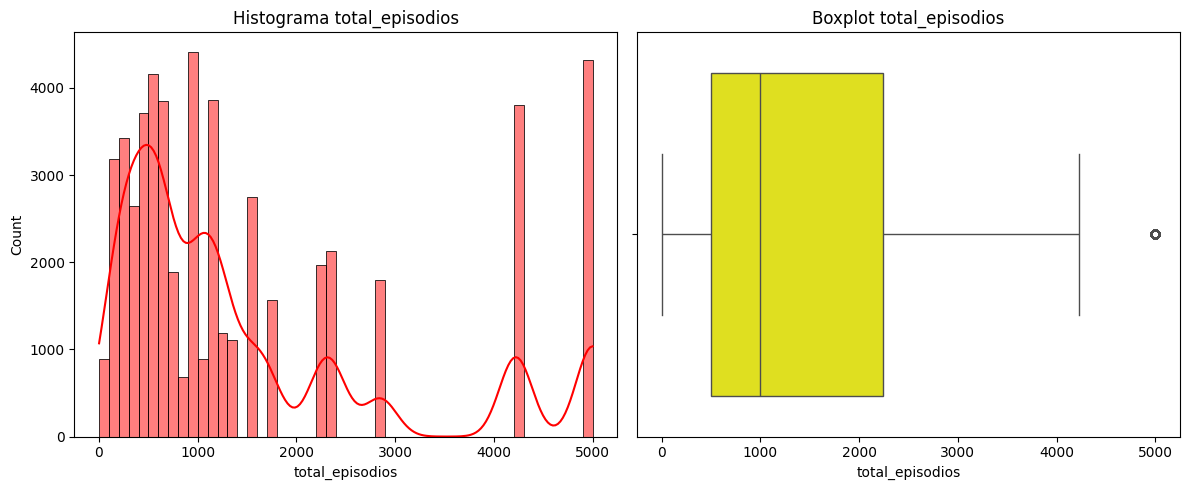

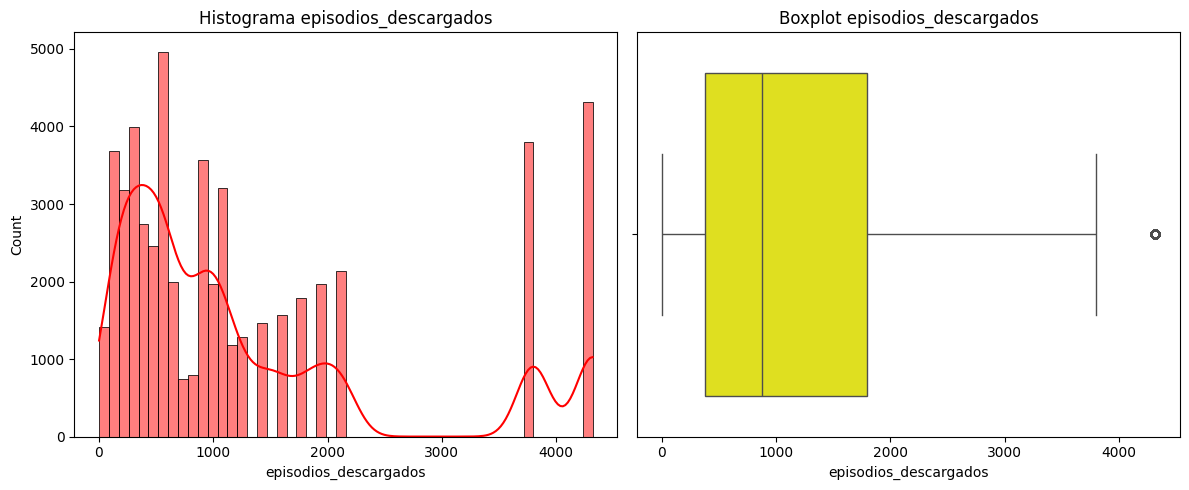

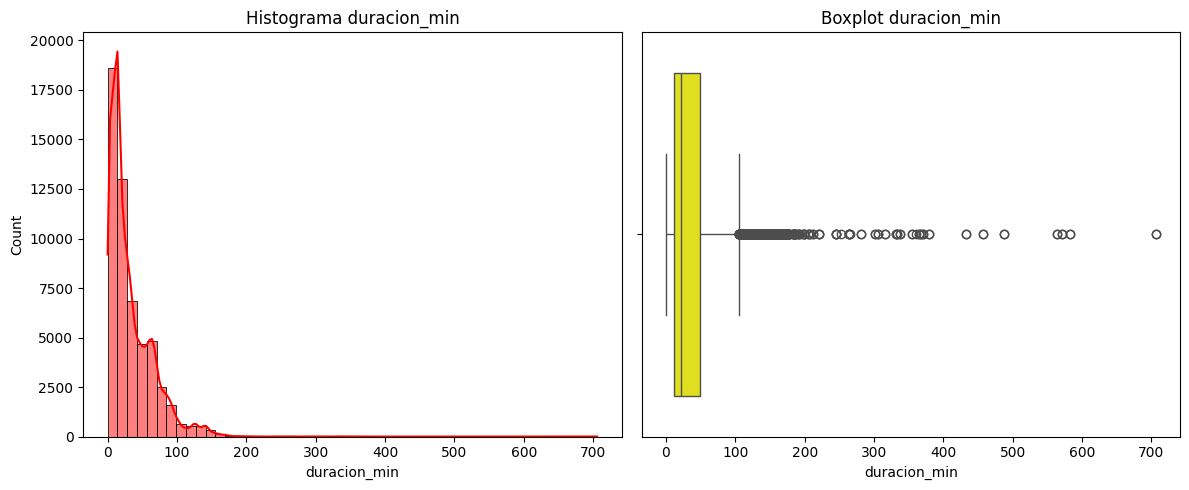

In [14]:
variables_cuant = ['total_episodios', 'episodios_descargados', 'duracion_min']  

for col in variables_cuant:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
   
    sns.histplot(df[col], bins=50, kde=True, ax=axes[0], color='red')
    axes[0].set_title(f'Histograma {col}')
    
    sns.boxplot(x=df[col], ax=axes[1], color='yellow')
    axes[1].set_title(f'Boxplot {col}')
     
    plt.tight_layout()
    plt.show()

In [15]:
def resumen_cuant(df, cols):
    frames = []
    for col in cols:
        agg = df[col].agg(
            mean='mean',
            median='median',
            mode=lambda x: x.mode()[0],
            std='std',
            var='var'
        ).to_frame(name='Historiplot_Stats')

        box = df[col].describe().to_frame(name='Boxplot_Stats')
        frames.append(pd.concat([agg, box], axis=1))
    return pd.concat(frames, axis=1, keys=cols) # Se detiene la ejecución del código, ya que todo lo que se ejecuta dentro de la función permanece ahí.

variables_cuant = ['total_episodios', 'episodios_descargados', 'duracion_min']
resultado_final  = resumen_cuant(df, variables_cuant)
display(resultado_final)

total_episodios               episodios_descargados                \
       Historiplot_Stats Boxplot_Stats     Historiplot_Stats Boxplot_Stats   
mean        1.528856e+03   1528.855530          1.309006e+03   1309.005645   
median      1.000000e+03           NaN          8.780000e+02           NaN   
mode        1.000000e+03           NaN          4.318000e+03           NaN   
std         1.470858e+03   1470.858311          1.285774e+03   1285.774326   
var         2.163424e+06           NaN          1.653216e+06           NaN   
count                NaN  54212.000000                   NaN  54212.000000   
min                  NaN      1.000000                   NaN      1.000000   
25%                  NaN    498.000000                   NaN    375.000000   
50%                  NaN   1000.000000                   NaN    878.000000   
75%                  NaN   2243.000000                   NaN   1793.000000   
max                  NaN   4999.000000                   NaN   4318.000000   

            duracion_min                
       Historiplot_Stats Boxplot_Stats  
mean           33.232123     33.232123  
median         22.060000           NaN  
mode           24.000000           NaN  
std            32.795132     32.795132  
var          1075.520674           NaN  
count                NaN  54212.000000  
min                  NaN      0.020000  
25%                  NaN     11.350000  
50%                  NaN     22.060000  
75%                  NaN     48.870000  
max                  NaN    705.820000

In [16]:
df[df.total_episodios == 4999]

,pais,idioma_show,categoria,podcast_id,nombre_podcast,editorial,total_episodios,episodios_descargados,proporcion_episodios,episodio_id,nombre_episodio,fecha_lanzamiento,año,mes,duracion_min,categoria_duracion,periodo_pandemia
29737,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,15uTry0UNJ7l1DfWswxmr0,dks daily shot of penguins buntings blessing,2022-02-08,2022,2,12.94,corto,post-pandemia
29738,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,24AX00iMNXDrmPDF3yRrEB,dks daily shot of steelers why sutton,2022-02-08,2022,2,10.45,corto,post-pandemia
29739,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,2iIJ9PrmpDRQ4IUdvUmMMU,dks daily shot of pirates um right field,2022-02-08,2022,2,14.75,corto,post-pandemia
29740,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,2Wb4G0NehBNtKWrPBymS6K,scouts eye with matt williamson tj watt slowin...,2022-02-08,2022,2,16.83,corto,post-pandemia
29741,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,6TPlhgGmB033ySoB6qguw2,dks double shot of steelers the big reset,2022-02-08,2022,2,24.51,medio,post-pandemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34050,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,4FYXFdTqXFmpdsZxzcQRpt,dks daily show of steelers the mason rudolph r...,2022-02-08,2022,2,14.96,corto,post-pandemia
34051,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,6QMpZKMneA9OkZisyBjHuF,dks daily shot of penguins danton heinen backs...,2022-02-08,2022,2,16.10,corto,post-pandemia
34052,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,0TcA2O1SdkUv6JsTv59oSR,dks daily shot of pirates what if the unthinka...,2022-02-08,2022,2,13.77,corto,post-pandemia
34053,US,EN,Deportes,6YpzDWgNKBHFZStcEtSjyl,DK Pittsburgh Sports: Daily podcasts on Steele...,"Dejan Kovacevic, Ramon Foster, Matt Williamson",4999,4318,0.86,2Nk3u2hGJiytFdzNnVqElk,yinzhers 99 problems and goodells no 1,2022-02-08,2022,2,34.82,medio,post-pandemia


### Comparativa de Distribuciones  
#### Boxplots con y sin *outliers* + Histogramas

A continuación se analizan las medidas de tendencia por periodo_pandemia y dispersión bajo dos escenarios:

1. **Datos originales (con *outliers*)**  
2. **Datos depurados (sin *outliers*)**

Para cada caso se muestran:
- Un **boxplot** que resume la mediana, cuartiles e intervalos de confianza.  
- Un **histograma** que ilustra la distribución de frecuencias.

> **Objetivo**  
> Evaluar cómo la presencia de *outliers* distorsiona las métricas descriptivas y la percepción visual de la distribución.

---

In [17]:
resumen_por_pandemia = df.groupby('periodo_pandemia', observed=True)[variables_cuant].describe()

print("Resumen estadístico agrupado por pandemia con outliers:")
display(resumen_por_pandemia.T)

Resumen estadístico agrupado por pandemia con outliers:


periodo_pandemia             post-pandemia      pandemia  pre-pandemia
total_episodios       count   17480.000000  24507.000000  12225.000000
                      mean     1887.207208   1603.003713    867.821840
                      std      1929.398432   1304.021080    480.420581
                      min        13.000000      1.000000     87.000000
                      25%       427.000000    581.000000    580.000000
                      50%       836.000000   1182.000000    645.000000
                      75%      2851.000000   2243.000000   1303.000000
                      max      4999.000000   4222.000000   1592.000000
episodios_descargados count   17480.000000  24507.000000  12225.000000
                      mean     1528.776430   1433.091402    746.014806
                      std      1665.495950   1174.524214    427.618139
                      min         3.000000      1.000000     61.000000
                      25%       299.000000    505.000000    492.000000
                      50%       685.000000   1050.000000    559.000000
                      75%      1793.000000   1964.000000   1105.000000
                      max      4318.000000   3799.000000   1460.000000
duracion_min          count   17480.000000  24507.000000  12225.000000
                      mean       35.895411     26.271550     43.377602
                      std        38.126301     29.469021     27.203407
                      min         0.020000      0.130000      1.310000
                      25%        11.930000      5.170000     20.220000
                      50%        24.000000     14.970000     33.760000
                      75%        47.467500     36.935000     64.920000
                      max       705.820000    361.020000    160.250000

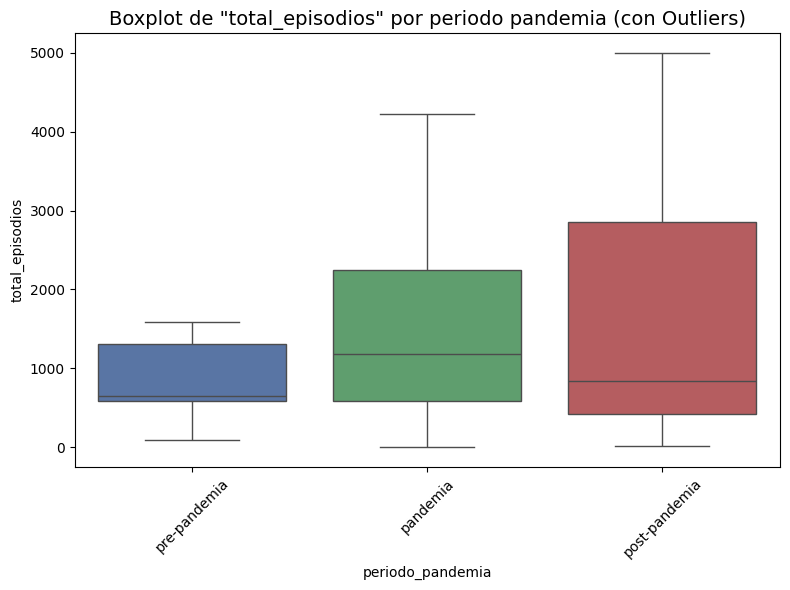

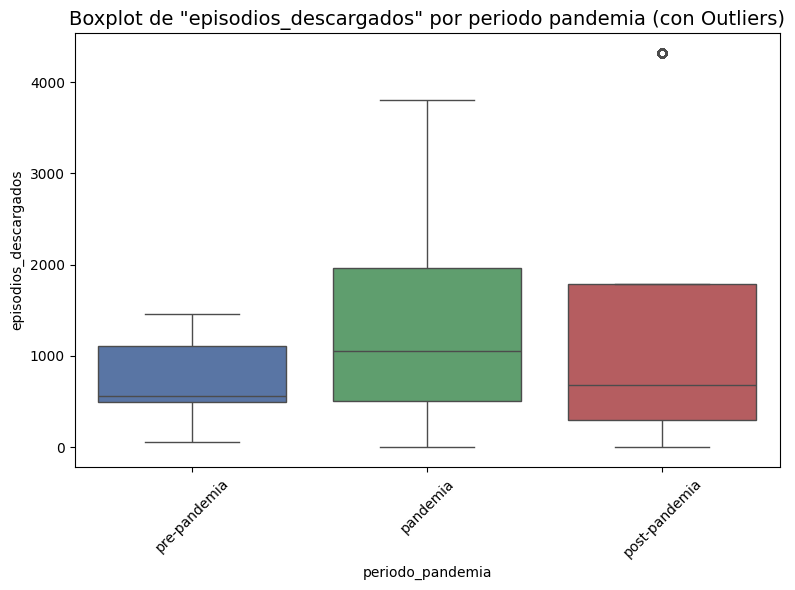

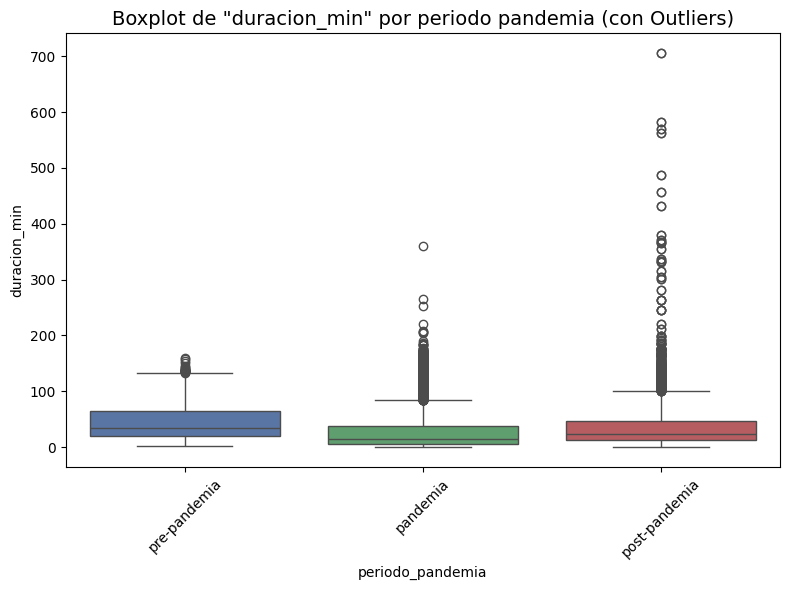

In [18]:
# Iteramos sobre cada variable cuantitativa para crear sus gráficos

paleta_color = {
    'pre-pandemia':  '#4C72B0',   # azul
    'pandemia':      '#55A868',   # verde
    'post-pandemia': '#C44E52'    # rojo
}

for i in variables_cuant:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='periodo_pandemia', y=i, hue = 'periodo_pandemia', palette=paleta_color, order = ['pre-pandemia', 'pandemia', 'post-pandemia'], legend=False)
    plt.title(f'Boxplot de "{i}" por periodo pandemia (con Outliers)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [36]:
# Se saca el calculo y el parametro de los outliers y se guarda en un nuevo dataframe #

df_sin_outliers = df.copy()

for i in variables_cuant:
    Q1 = df_sin_outliers[i].quantile(0.25)
    Q3 = df_sin_outliers[i].quantile(0.75)
    IQR = Q3 - Q1 # Indice Interquartil #
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    filas_buenas = (df_sin_outliers[i] >= limite_inferior) & (df_sin_outliers[i] <= limite_superior)
    df_sin_outliers = df_sin_outliers[filas_buenas]

df_sin_outliers = df_sin_outliers.reset_index(drop=True)

df_sin_outliers

,pais,idioma_show,categoria,podcast_id,nombre_podcast,editorial,total_episodios,episodios_descargados,proporcion_episodios,episodio_id,nombre_episodio,fecha_lanzamiento,año,mes,duracion_min,categoria_duracion,periodo_pandemia
0,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,7khIMhVcZIHYEbjj3l5a75,300 frases inspiradoras para iniciar el 2025 c...,2023-03-24,2023,3,35.24,medio,post-pandemia
1,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,0Vw5WhD5mwMNljOE5qwU9X,yo soy decretos poderoso escucharlo antes dorm...,2023-03-24,2023,3,15.15,corto,post-pandemia
2,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,4whHAMRxTPXNIp1QPseVIv,haz esto 5 minutos antes de dormir y transform...,2023-03-24,2023,3,6.51,muy corto,post-pandemia
3,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,6BWtTPKIXd6dPCeDvTOciL,una transformación extraordinaria comienza dr...,2023-03-24,2023,3,12.34,corto,post-pandemia
4,AR,ES,Tecnología,3YXHj1dXZ3y2dvmhIOcwA4,IQ POTENCIADO,SAM CHRIST,135,80,0.59,5YSRRh9UIVoqwUfkjvqK6F,meditación para dormir y manisfestar con afirm...,2023-03-24,2023,3,3.70,muy corto,post-pandemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44587,GB,EN,Deportes,1K6D9FvjxKCn0EtwX1uy7P,DR Sports Talking Football Podcast,DR Sports,184,134,0.73,0mqqffYTgTJFowVYnxtqP9,liverpool to face newcastle on sunday balogun...,2023-08-10,2023,8,66.48,muy largo,post-pandemia
44588,GB,EN,Deportes,1K6D9FvjxKCn0EtwX1uy7P,DR Sports Talking Football Podcast,DR Sports,184,134,0.73,6aKUVDj54CUf0t0Dl8YEQz,caicedo has a nightmare debut are man united ...,2023-08-10,2023,8,78.10,muy largo,post-pandemia
44589,GB,EN,Deportes,1K6D9FvjxKCn0EtwX1uy7P,DR Sports Talking Football Podcast,DR Sports,184,134,0.73,47CGLLkd1A0TyySeej5prS,will england win the world cup de bruyne out ...,2023-08-10,2023,8,65.24,muy largo,post-pandemia
44590,GB,EN,Deportes,1K6D9FvjxKCn0EtwX1uy7P,DR Sports Talking Football Podcast,DR Sports,184,134,0.73,1IhdDuM0sJqlxttzqREeKM,chelsea agree record 115m fee for caicedo haa...,2023-08-10,2023,8,64.43,muy largo,post-pandemia


In [37]:
resumen_por_pandemia = df_sin_outliers.groupby('periodo_pandemia',  observed=True)[variables_cuant].describe()

print("Resumen estadístico agrupado por pandemia sin outliers:")
display(resumen_por_pandemia.T)

Resumen estadístico agrupado por pandemia sin outliers:


periodo_pandemia             post-pandemia      pandemia  pre-pandemia
total_episodios       count   12385.000000  20075.000000  12132.000000
                      mean      856.615341   1138.240199    868.868859
                      std       837.307509    729.058175    481.008552
                      min        13.000000      1.000000     87.000000
                      25%       241.000000    513.000000    580.000000
                      50%       554.000000   1000.000000    645.000000
                      75%      1000.000000   1744.000000   1303.000000
                      max      2851.000000   2377.000000   1592.000000
episodios_descargados count   12385.000000  20075.000000  12132.000000
                      mean      608.470569   1013.295890    747.077069
                      std       535.289820    650.927297    428.238726
                      min         3.000000      1.000000     61.000000
                      25%       159.000000    463.000000    492.000000
                      50%       430.000000    890.000000    559.000000
                      75%       797.000000   1568.000000   1105.000000
                      max      1793.000000   2134.000000   1460.000000
duracion_min          count   12385.000000  20075.000000  12132.000000
                      mean       33.899942     26.802069     42.736547
                      std        28.177915     22.760549     26.286978
                      min         0.250000      0.130000      1.310000
                      25%        11.030000      9.830000     20.130000
                      50%        27.450000     17.620000     33.465000
                      75%        50.040000     40.885000     64.582500
                      max       116.970000    116.770000    116.790000

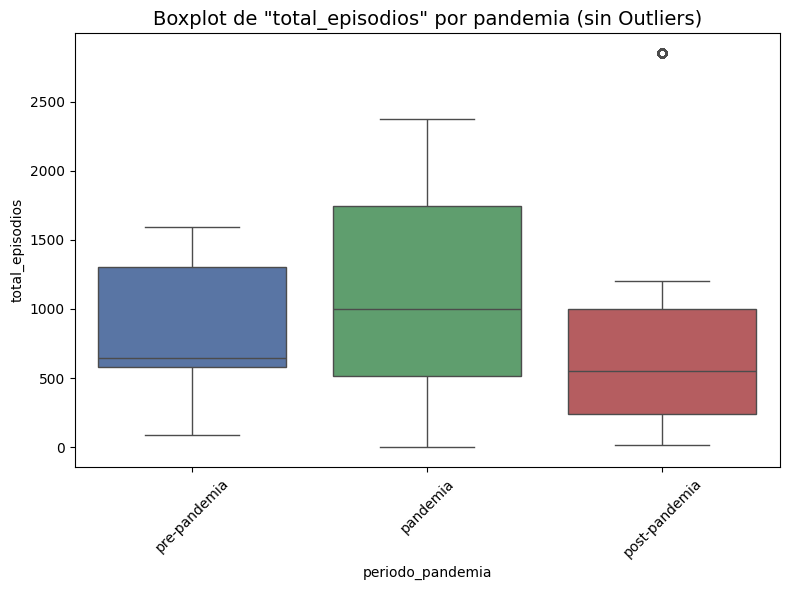

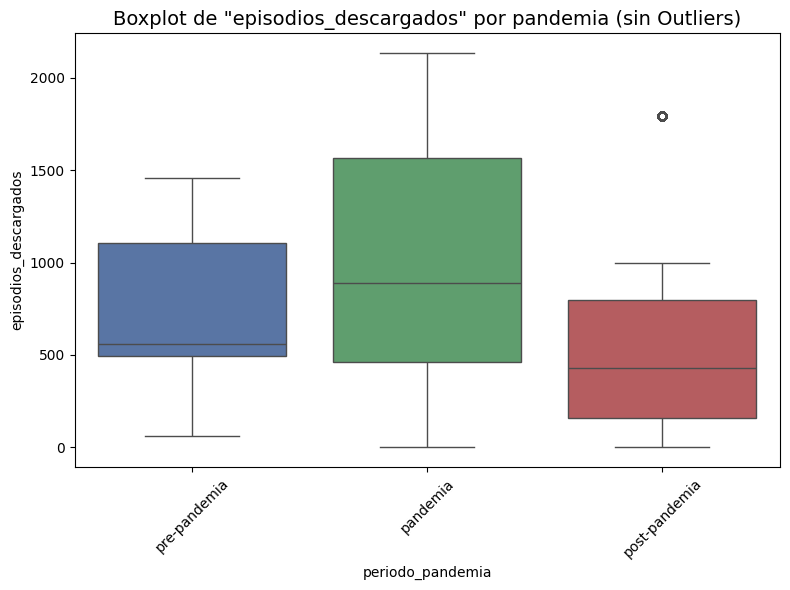

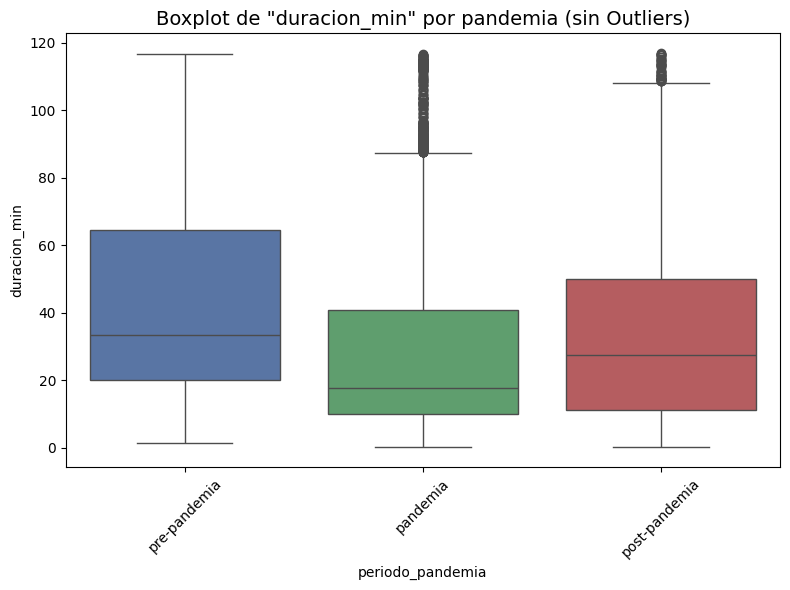

In [38]:
# Iteramos sobre cada variable cuantitativa para crear sus gráficos

for i in variables_cuant:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_sin_outliers, x='periodo_pandemia', y=i, 
                hue = 'periodo_pandemia', palette=paleta_color, 
                order = ['pre-pandemia', 'pandemia', 'post-pandemia'], legend=False)
    plt.title(f'Boxplot de "{i}" por pandemia (sin Outliers)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

"""
### Resumen comparativo – boxplots con vs. sin outliers  
*Criterio de detección de outliers: método Tukey (1.5 × IQR).*

| Variable | % filas marcadas como outlier | Media con | Media sin | Δ Media | Desv. típica con | Desv. típica sin | Δ Std | IQR con | IQR sin | Δ IQR |
|----------|------------------------------|-----------|-----------|---------|------------------|------------------|-------|---------|---------|-------|
| **total_episodios** | 8 % | 1 528.9 | 1 228.5 | **−19.6 %** | 1 470.9 | 1 103.8 | **−25 %** | 1 745 | 1 155 | **−34 %** |
| **episodios_descargados** | 8 % | 1 309.0 | 1 048.6 | **−19.9 %** | 1 285.8 | 972.1 | **−24 %** | 1 418 | 1 100 | **−22 %** |
| **duracion_min** | 3.4 % | 33.23 | 29.46 | **−11.4 %** | 32.80 | 24.88 | **−24 %** | 37.52 | 33.79 | **−9.9 %** |

#### Lectura rápida
- **Magnitud del problema**  
  Los picos representan ~8 % de los registros en los conteos de episodios y ~3 % en la duración.

- **Efecto principal**  
  Al eliminarlos la media cae entre −11 % y −20 %, mientras que la mediana apenas se mueve (quedó en 1 000 ep. y 20‑22 min) — señal de una asimetría moderada.

- **Dispersión**  
  La desviación típica y el IQR se contraen (−24 % ∼ −34 %), mostrando que la mayor parte de la variabilidad extrema provenía precisamente de esos valores atípicos.

- **Conclusión operacional**  
  Si tu objetivo es describir la “masa” típica del catálogo, conviene excluirlos o, al menos, tratarlos aparte. Para métricas robustas (mediana, percentiles) puedes mantenerlos sin peligro, pero para medias/totales es mejor usar el dataset limpio o aplicar transformaciones (p. ej. log).

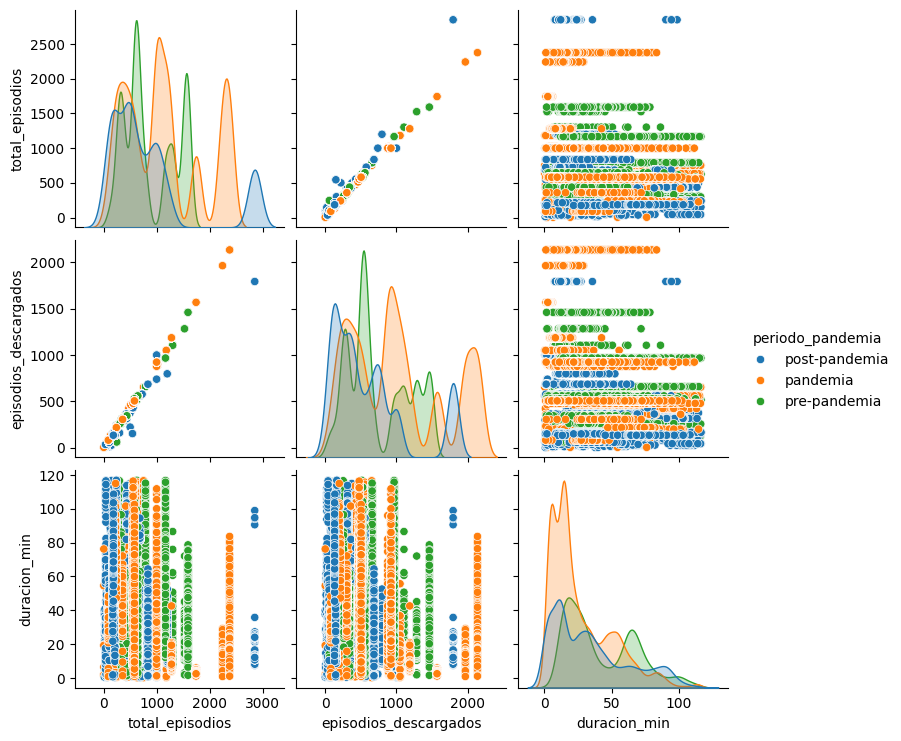

In [39]:
sns.pairplot(df_sin_outliers[['total_episodios', 'episodios_descargados', 'duracion_min', 'periodo_pandemia']], hue = 'periodo_pandemia');

In [40]:
for i in ['pearson', 'spearman', 'kendall']:
    print('\n',i, '*** \n', df_sin_outliers[['total_episodios', 'episodios_descargados', 'duracion_min']].corr(method = i))


 pearson *** 
                        total_episodios  episodios_descargados  duracion_min
total_episodios               1.000000               0.974102     -0.455075
episodios_descargados         0.974102               1.000000     -0.463924
duracion_min                 -0.455075              -0.463924      1.000000

 spearman *** 
                        total_episodios  episodios_descargados  duracion_min
total_episodios               1.000000               0.987317     -0.519482
episodios_descargados         0.987317               1.000000     -0.511583
duracion_min                 -0.519482              -0.511583      1.000000

 kendall *** 
                        total_episodios  episodios_descargados  duracion_min
total_episodios               1.000000               0.932297     -0.338945
episodios_descargados         0.932297               1.000000     -0.334653
duracion_min                 -0.338945              -0.334653      1.000000
